In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/popular_10000_movies_tmdb.csv")

In [3]:
df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [4]:
#veri seti hakkında genel  bilgi alalım.
def check_df(dataframe,head = 5):
    print(" Shape ".center(60, '#'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(" Types ".center(60, '#'))
    print(dataframe.dtypes)
    print(" İnfo ".center(60, '#'))
    print(dataframe.info())
    print(" Head ".center(60, '#'))
    print(dataframe.head(head))
    print(" Tail ".center(60, '#'))
    print(dataframe.tail(head))
    print(" NA ".center(60, '#'))
    print(dataframe.isnull().sum())
    print(" Columns ".center(60,'#'))
    print(df.columns)
    
check_df(df)


########################## Shape ###########################
Observations -------> 10000
Features     -------> 14
########################## Types ###########################
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object
########################### İnfo ###########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null

In [5]:
df['overview'][0]

"Father Gabriele Amorth, Chief Exorcist of the Vatican, investigates a young boy's terrifying possession and ends up uncovering a centuries-old conspiracy the Vatican has desperately tried to keep hidden."

In [6]:
df['tagline'][0]

'Inspired by the actual files of Father Gabriele Amorth, Chief Exorcist of the Vatican.'

In [7]:
df.drop(['id','overview','tagline'], axis=1,inplace = True)

In [8]:
df.columns

Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'budget', 'production_companies', 'revenue',
       'runtime'],
      dtype='object')

In [9]:
df.isnull().sum()

title                    0
release_date            21
genres                   0
original_language        0
vote_average             0
vote_count               0
popularity               0
budget                   0
production_companies     0
revenue                  0
runtime                  0
dtype: int64

In [10]:
df.dropna(axis =0, inplace = True)

In [11]:
df.columns

Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'budget', 'production_companies', 'revenue',
       'runtime'],
      dtype='object')

In [12]:
df.shape

(9979, 11)

In [13]:
df['original_language'].unique()

array(['English', 'French', 'Dutch', 'Spanish', 'Korean', 'Japanese',
       'Finnish', 'Ukrainian', 'Norwegian', 'Estonian', 'cn', 'Polish',
       'Russian', 'German', 'Chinese', 'Italian', 'Basque', 'Thai',
       'Turkish', 'Swedish', 'Icelandic', 'Tagalog', 'Bengali', 'Arabic',
       'Tamil', 'Telugu', 'Romanian', 'Indonesian', 'Galician', 'Danish',
       'Macedonian', 'Portuguese', 'Vietnamese', 'Catalan', 'Hindi',
       'Persian', 'Hebrew', 'Serbian', 'Malayalam', 'Greek', 'Hungarian',
       'Czech', 'Norwegian Bokmal', 'xx', 'Kannada', 'Irish', 'Khmer',
       'sh', 'Dzongkha', 'Panjabi', 'Sundanese'], dtype=object)

In [14]:
df[df['original_language'] == "xx"]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
6340,Barbie,1977-01-01,[],xx,2.0,1,9.890,0,[],0,10
7837,Vertigo,2016-08-10,['Drama'],xx,2.0,1,10.093,200,[],0,6


In [15]:
df = df[~(df['original_language'] == 'xx')]

In [16]:
df.shape

(9977, 11)

In [17]:
df[df['original_language'] == "sh"]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
9096,I Miss Sonia Henie,1971-01-20,"['Comedy', 'Drama']",sh,5.5,15,13.323,0,['Neoplanta Film'],0,16


In [18]:
df = df[~(df['original_language'] == 'sh')]

In [19]:
df.shape

(9976, 11)

In [20]:
#DataFrame'deki tekrar eden  girişlerin sayısı

df.duplicated().sum()

0

In [21]:
df['title'].nunique()

9629

In [22]:
df["title"].duplicated().sum()

347

In [23]:
df[df['title'].isin(df['title'][df['title'].duplicated()])].sort_values('title')

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
9364,3:10 to Yuma,1957-08-07,"['Western', 'Drama', 'Thriller']",English,7.2,291,10.993,0,['Columbia Pictures'],0,92
5116,3:10 to Yuma,2007-09-06,['Western'],English,7.2,3131,18.967,55000000,"['Lionsgate', 'Tree Line Films', 'Relativity M...",70016220,122
2684,A Nightmare on Elm Street,2010-04-30,"['Horror', 'Mystery', 'Thriller']",English,5.5,2415,25.679,35000000,"['Platinum Dunes', 'New Line Cinema', 'Warner ...",115664037,95
1637,A Nightmare on Elm Street,1984-11-09,['Horror'],English,7.3,4430,36.600,1100000,"['New Line Cinema', 'Smart Egg Pictures', 'Med...",57000000,91
7330,A Tale of Two Sisters,2023-05-06,[],English,0.0,0,10.538,0,[],0,8
...,...,...,...,...,...,...,...,...,...,...,...
902,Wonder Woman,2017-05-30,"['Action', 'Adventure', 'Fantasy']",English,7.2,18595,54.481,149000000,"['Atlas Entertainment', 'Cruel & Unusual Films...",822854286,141
1133,Wrong Turn,2003-05-30,"['Horror', 'Thriller']",English,6.3,2307,50.411,12600000,"['DCP Wrong Turn Productions', 'Summit Enterta...",28650575,84
774,Wrong Turn,2021-01-26,"['Horror', 'Thriller', 'Drama']",English,6.0,902,59.587,0,"['Constantin Film', 'The H Collective', 'Tea S...",3777969,110
202,X,2022-03-17,"['Horror', 'Mystery', 'Thriller']",English,6.8,1918,129.629,10000000,"['A24', 'Little Lamb Productions']",14779858,106


In [24]:
df[df["genres"].str.len () ==2 ]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
610,Snake Beauty,1994-03-26,[],Chinese,0.0,0,61.292,0,['Ka Shing Film Production Co.'],0,88
684,Za gyakutai: Nyotai ikedori-hen,1987-07-18,[],Japanese,6.5,1,62.096,0,['Orient 21'],0,64
816,Gabriel's Inferno: Part IV,2022-03-30,[],English,5.0,2,37.269,0,[],0,0
943,Yu Pui Tsuen,1986-12-12,[],cn,4.0,4,78.229,0,[],0,93
1178,Oppressive Torture,1978-01-14,[],Japanese,4.7,3,45.046,0,['Wakamatsu Production'],0,61
...,...,...,...,...,...,...,...,...,...,...,...
8809,The Legend of Zhao Yun,2021-01-04,[],Chinese,2.0,1,9.461,0,[],0,96
8982,Russian Nymphet: Temptation,2004-11-28,[],Russian,5.3,3,16.728,0,['Eros Film'],0,35
9484,La Boheme: Breathe Umphefumlo,2015-02-05,[],English,6.7,3,11.171,0,[],0,0
9775,野浪花,1987-05-26,[],Chinese,0.0,0,8.040,0,[],0,0


In [25]:
df = df[~(df['genres'].str.len() == 2)]

In [26]:
df.shape

(9915, 11)

In [27]:
df[df['production_companies'].str.len () ==2 ]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
21,Adrenaline,2022-12-15,['Action'],English,5.9,39,717.878,0,[],0,75
27,The Elderly,2023-04-21,"['Horror', 'Thriller', 'Fantasy']",Spanish,5.8,6,521.201,0,[],0,95
28,Ripper's Revenge,2023-04-03,['Horror'],English,4.9,10,523.118,0,[],0,85
36,Gangs of Lagos,2023-04-07,['Crime'],English,6.1,35,462.815,160000000,[],0,124
46,Prizefighter: The Life of Jem Belcher,2022-06-30,"['Drama', 'History']",English,6.2,122,365.065,0,[],0,107
...,...,...,...,...,...,...,...,...,...,...,...
9905,My Mother's Lovers,2020-05-29,['Drama'],Spanish,2.8,5,12.444,0,[],0,22
9924,My Brother's Wife 2,2016-08-31,"['Romance', 'Family', 'Drama']",Korean,3.5,2,10.341,0,[],0,98
9930,Zombie Fight Club,2014-10-23,"['Action', 'Horror']",Chinese,4.7,54,12.899,0,[],0,95
9975,Heart Shot,2022-02-17,"['Romance', 'Crime']",English,5.6,69,9.132,0,[],0,19


In [28]:
df = df[~(df['production_companies'].str.len() == 2)]

In [29]:
(df ==0).sum()

title                      0
release_date               0
genres                     0
original_language          0
vote_average             130
vote_count               129
popularity                 0
budget                  4286
production_companies       0
revenue                 3986
runtime                  106
dtype: int64

In [30]:
df[(df["vote_average"] ==0 ) | (df['vote_count'] == 0) | (df['runtime'] == 0)]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
23,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,0.0,0,732.647,340000000,"['Universal Pictures', 'Original Film', 'One R...",0,142
100,"Kiss, Kiss!",2023-04-26,"['Romance', 'Comedy']",Polish,6.9,15,361.900,0,['Lightcraft'],0,0
101,The Little Mermaid,2023-05-18,"['Adventure', 'Family', 'Fantasy', 'Romance']",English,0.0,0,220.944,0,"['Walt Disney Pictures', 'Lucamar Productions'...",0,135
128,Transformers: Rise of the Beasts,2023-06-07,"['Action', 'Adventure', 'Science Fiction']",English,0.0,0,222.430,200000000,"['Skydance Media', 'Paramount', 'di Bonaventur...",0,0
184,The Flash,2023-06-14,"['Science Fiction', 'Action', 'Adventure']",English,0.0,0,123.659,220000000,"['Warner Bros. Pictures', 'Double Dream', 'The...",0,0
...,...,...,...,...,...,...,...,...,...,...,...
9847,Divaldo: O Mensageiro da Paz,2019-09-12,['Drama'],Portuguese,8.3,59,16.640,0,"['20th Century Fox Brazil', 'CINE Cinematográf...",0,0
9889,Influencer,2023-05-18,"['Thriller', 'Horror', 'Mystery']",English,0.0,0,8.454,0,"['Octane Entertainment', 'Superchill']",0,92
9922,Mental Finger,2023-05-06,"['Comedy', 'Action']",Sundanese,0.0,0,9.660,0,['Cinemora Pictures'],0,12
9926,"Patricia, A Hidden Passion",2020-01-21,"['Drama', 'Comedy']",Spanish,6.0,33,12.780,0,['Cine Latino'],0,0


In [31]:
df = df[~((df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0))]

In [32]:
df.shape

(9223, 11)

In [33]:
df.describe()

,vote_average,vote_count,popularity,budget,revenue,runtime
count,9223.000000,9223.000000,9223.000000,9.223000e+03,9.223000e+03,9223.000000
mean,6.542546,1652.788247,31.635078,2.081719e+07,6.479669e+07,103.287867
std,0.907423,2952.562540,114.867339,3.935068e+07,1.596469e+08,24.410714
min,1.000000,1.000000,7.411000,0.000000e+00,0.000000e+00,2.000000
25%,6.000000,170.000000,13.591000,0.000000e+00,0.000000e+00,91.000000
50%,6.600000,580.000000,17.619000,2.500000e+06,3.769990e+06,101.000000
75%,7.200000,1726.000000,27.182500,2.500000e+07,5.806524e+07,115.000000
max,10.000000,33633.000000,5089.969000,5.793304e+08,2.923706e+09,449.000000


In [34]:
# kar sutünü ekleme 
df['profit'] = df['revenue'] - df['budget']

In [35]:
df.head()

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,profit
0,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,47675816
1,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,264566092
2,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,1021048165
3,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120,0
4,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,8437105


In [36]:
df.to_csv("movies.csv" ,index = False)

In [37]:
# Her Kategorinin En İyi 10 Filmi

max_budget = df.sort_values("budget",ascending = False).head(10)
max_revenue = df.sort_values('revenue', ascending=False).head(10)
max_profit = df.sort_values('profit', ascending=False).head(10)
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
max_popularity = df.sort_values('popularity', ascending=False).head(10)
max_vc = df.sort_values('vote_count', ascending=False).head(10)
max_va = df.sort_values('vote_average', ascending=False).head(10)


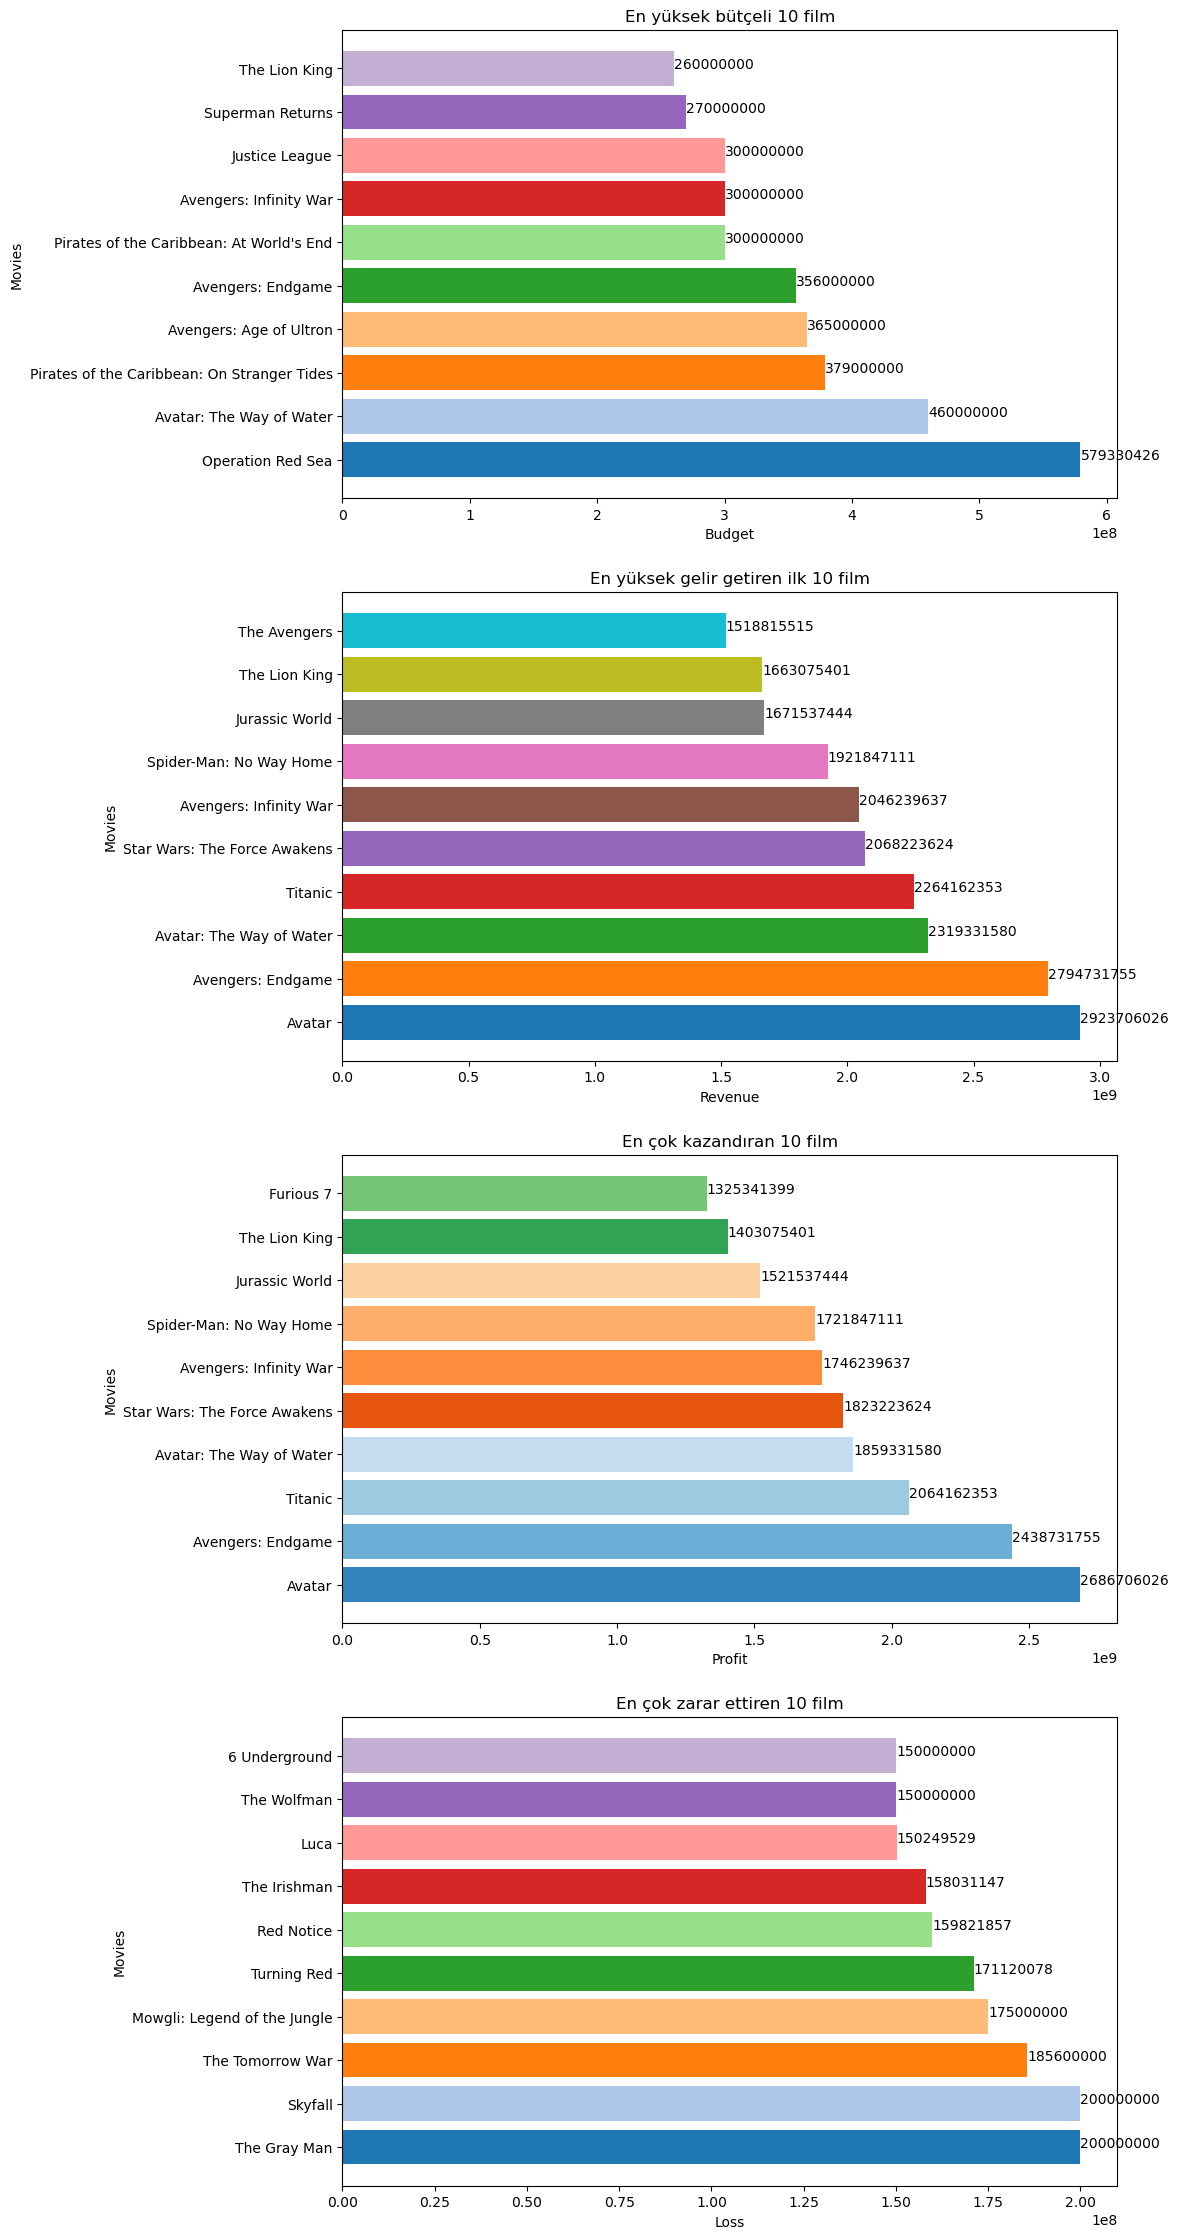

In [38]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('En yüksek bütçeli 10 film')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('En yüksek gelir getiren ilk 10 film')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('En çok kazandıran 10 film')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])
    
col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('En çok zarar ettiren 10 film')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

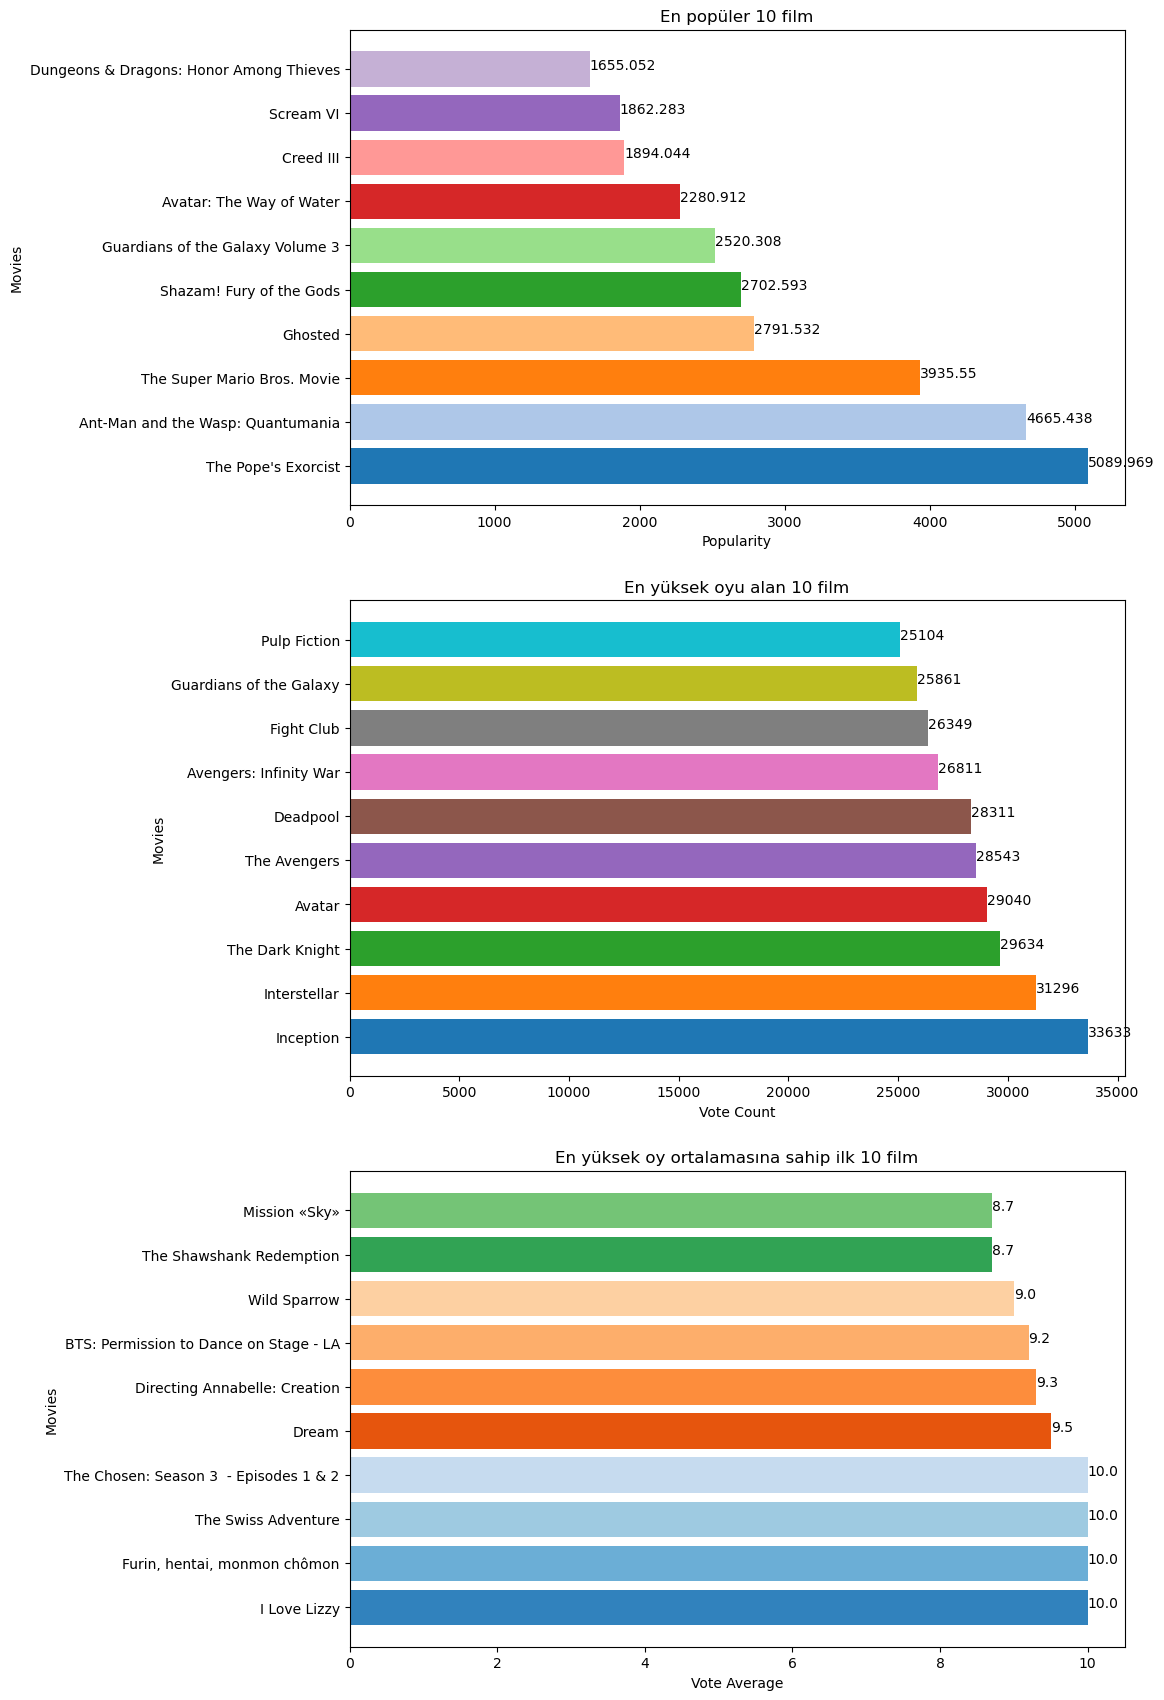

In [39]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('En popüler 10 film')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('En yüksek oyu alan 10 film')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('En yüksek oy ortalamasına sahip ilk 10 film')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()

In [40]:
df["original_language"].value_counts()

English             6962
Japanese             648
Spanish              289
French               283
Korean               182
Italian              143
cn                   119
Chinese              108
German                78
Russian               65
Tagalog               35
Hindi                 33
Norwegian             31
Danish                30
Polish                26
Portuguese            24
Thai                  23
Swedish               23
Dutch                 22
Indonesian            16
Turkish               14
Tamil                  8
Telugu                 7
Finnish                6
Greek                  4
Romanian               4
Ukrainian              4
Arabic                 3
Basque                 3
Hungarian              3
Persian                3
Galician               2
Khmer                  2
Kannada                2
Czech                  2
Malayalam              2
Serbian                2
Hebrew                 2
Catalan                2
Icelandic              2


In [41]:
# Veri kümesindeki tüm benzersiz türlerin sayısı

genres_col = df["genres"]
unique_genres = set()  # Benzersiz türleri depolamak için boş küme


for genres_list in genres_col:
    genres = eval(genres_list)
    unique_genres.update(genres)

    

print(unique_genres)
print(len(unique_genres))


{'Science Fiction', 'Family', 'Documentary', 'Thriller', 'Western', 'Fantasy', 'Crime', 'Comedy', 'Adventure', 'TV Movie', 'Drama', 'Romance', 'Mystery', 'Animation', 'Music', 'History', 'Action', 'War', 'Horror'}
19


In [47]:
#Her Türden En Popüler 5 Film

for  genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)].sort_values("popularity", ascending=False).head(5)
    #print(movies)
    movie_title = movies["title"]
    print(genre)
    for i , title in enumerate(movie_title):
        print(i+1 ,title)
    print("\n")
        
 

Science Fiction
1 Ant-Man and the Wasp: Quantumania
2 Guardians of the Galaxy Volume 3
3 Avatar: The Way of Water
4 65
5 Black Panther: Wakanda Forever


Family
1 The Super Mario Bros. Movie
2 Peter Pan & Wendy
3 Puss in Boots: The Last Wish
4 Pirates Down the Street II: The Ninjas from Across
5 Mummies


Documentary
1 Money Shot: The Pornhub Story
2 Orgasm Inc: The Story of OneTaste
3 Cocaine Bear: The True Story
4 Harry Potter 20th Anniversary: Return to Hogwarts
5 Melody Makers


Thriller
1 The Pope's Exorcist
2 Scream VI
3 AKA
4 John Wick: Chapter 4
5 Cocaine Bear


Western
1 Ghosts of the Ozarks
2 Django Unchained
3 Spirit: Stallion of the Cimarron
4 Paws of Fury: The Legend of Hank
5 Tom and Jerry Cowboy Up!


Fantasy
1 The Super Mario Bros. Movie
2 Shazam! Fury of the Gods
3 Dungeons & Dragons: Honor Among Thieves
4 Peter Pan & Wendy
5 Puss in Boots: The Last Wish


Crime
1 AKA
2 John Wick: Chapter 4
3 Murder Mystery 2
4 Cocaine Bear
5 Kill Boksoon


Comedy
1 The Super Mario Bro

In [48]:
#Her Türden En Karlı 5 Film

for  genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)].sort_values("profit", ascending=False).head(5)
    #print(movies)
    movie_title = movies["title"]
    print(genre)
    for i , title in enumerate(movie_title):
        print(i+1 ,title)
    print("\n")



Science Fiction
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


Family
1 The Lion King
2 Frozen II
3 Frozen
4 Beauty and the Beast
5 Minions


Documentary
1 Fahrenheit 9/11
2 This Is It
3 Jackass 3D
4 Jackass Forever
5 Jackass Number Two


Thriller
1 Jurassic World
2 Furious 7
3 Jurassic World: Fallen Kingdom
4 Joker
5 The Fate of the Furious


Western
1 Dances with Wolves
2 The Revenant
3 Django Unchained
4 True Grit
5 City Slickers


Fantasy
1 Avatar
2 Star Wars: The Force Awakens
3 Frozen II
4 Harry Potter and the Deathly Hallows: Part 2
5 Frozen


Crime
1 Furious 7
2 Joker
3 The Fate of the Furious
4 The Dark Knight Rises
5 The Dark Knight


Comedy
1 Frozen II
2 Minions
3 The Super Mario Bros. Movie
4 Despicable Me 3
5 Jumanji: Welcome to the Jungle


Adventure
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


TV Movie
1 High School Musical 2
2 A Year-En

In [54]:
# En fazla filme  sahip ilk 5 yapım şirketi

companies_column =  df['production_companies']

# şirket adı ve filim saysısı için boş bir sözlük
company_counts = {}

for companies_list  in companies_column:
    companies = eval(companies_list)
    #print(companies)
    for company in companies:
        if company in company_counts:
            company_counts[company]+=1
        else:
            company_counts[company] =1

sorted_companies = sorted(company_counts.items(),key = lambda x:x[1], reverse = True)

top_5_companies = sorted_companies[:5]

for company, count in top_5_companies:
    print(company, ": ", count)
        
    




Warner Bros. Pictures :  488
Universal Pictures :  470
Paramount :  374
Columbia Pictures :  360
20th Century Fox :  348


In [64]:
# Popülaritesi ile her 5 yılda bir en çok izlenen film

df['release_date'] = pd.to_datetime(df['release_date'])

df["release_hd"] = (df['release_date'].dt.year // 5 ) *5


popular_movies = df.groupby("release_hd").apply(lambda x :x.nlargest(1, 'popularity'))


for i, r in popular_movies.iterrows():
    print(f"Year: {r['release_hd']}-{r['release_hd']+4}")
    print("Movie:", r['title'])
    print("Popularity:", r['popularity'])
    print("\n")







Year: 1900-1904
Movie: A Trip to the Moon
Popularity: 14.584


Year: 1920-1924
Movie: Nosferatu
Popularity: 18.37


Year: 1925-1929
Movie: Metropolis
Popularity: 17.496


Year: 1930-1934
Movie: Baby Face
Popularity: 35.37


Year: 1935-1939
Movie: Snow White and the Seven Dwarfs
Popularity: 61.616


Year: 1940-1944
Movie: Bambi
Popularity: 43.576


Year: 1945-1949
Movie: Samson and Delilah
Popularity: 27.865


Year: 1950-1954
Movie: Cinderella
Popularity: 73.639


Year: 1955-1959
Movie: Sleeping Beauty
Popularity: 37.958


Year: 1960-1964
Movie: One Hundred and One Dalmatians
Popularity: 47.549


Year: 1965-1969
Movie: The Jungle Book
Popularity: 52.291


Year: 1970-1974
Movie: The Godfather
Popularity: 113.216


Year: 1975-1979
Movie: Star Wars
Popularity: 90.988


Year: 1980-1984
Movie: Oscenità
Popularity: 129.957


Year: 1985-1989
Movie: The Little Mermaid
Popularity: 104.76


Year: 1990-1994
Movie: Super Mario Bros.
Popularity: 124.391


Year: 1995-1999
Movie: Titanic
Popularity: 1

In [65]:
# Yıla Göre Ortalama Popülerlik

df['year'] = df['release_date'].dt.year
avg_pop = df.groupby('year')['popularity'].mean()


In [66]:
avg_pop

year
1902     14.584000
1920     13.050000
1921     12.684000
1922     18.370000
1925     10.573000
           ...    
2019     23.405382
2020     22.287875
2021     28.149363
2022     58.541822
2023    234.183820
Name: popularity, Length: 101, dtype: float64

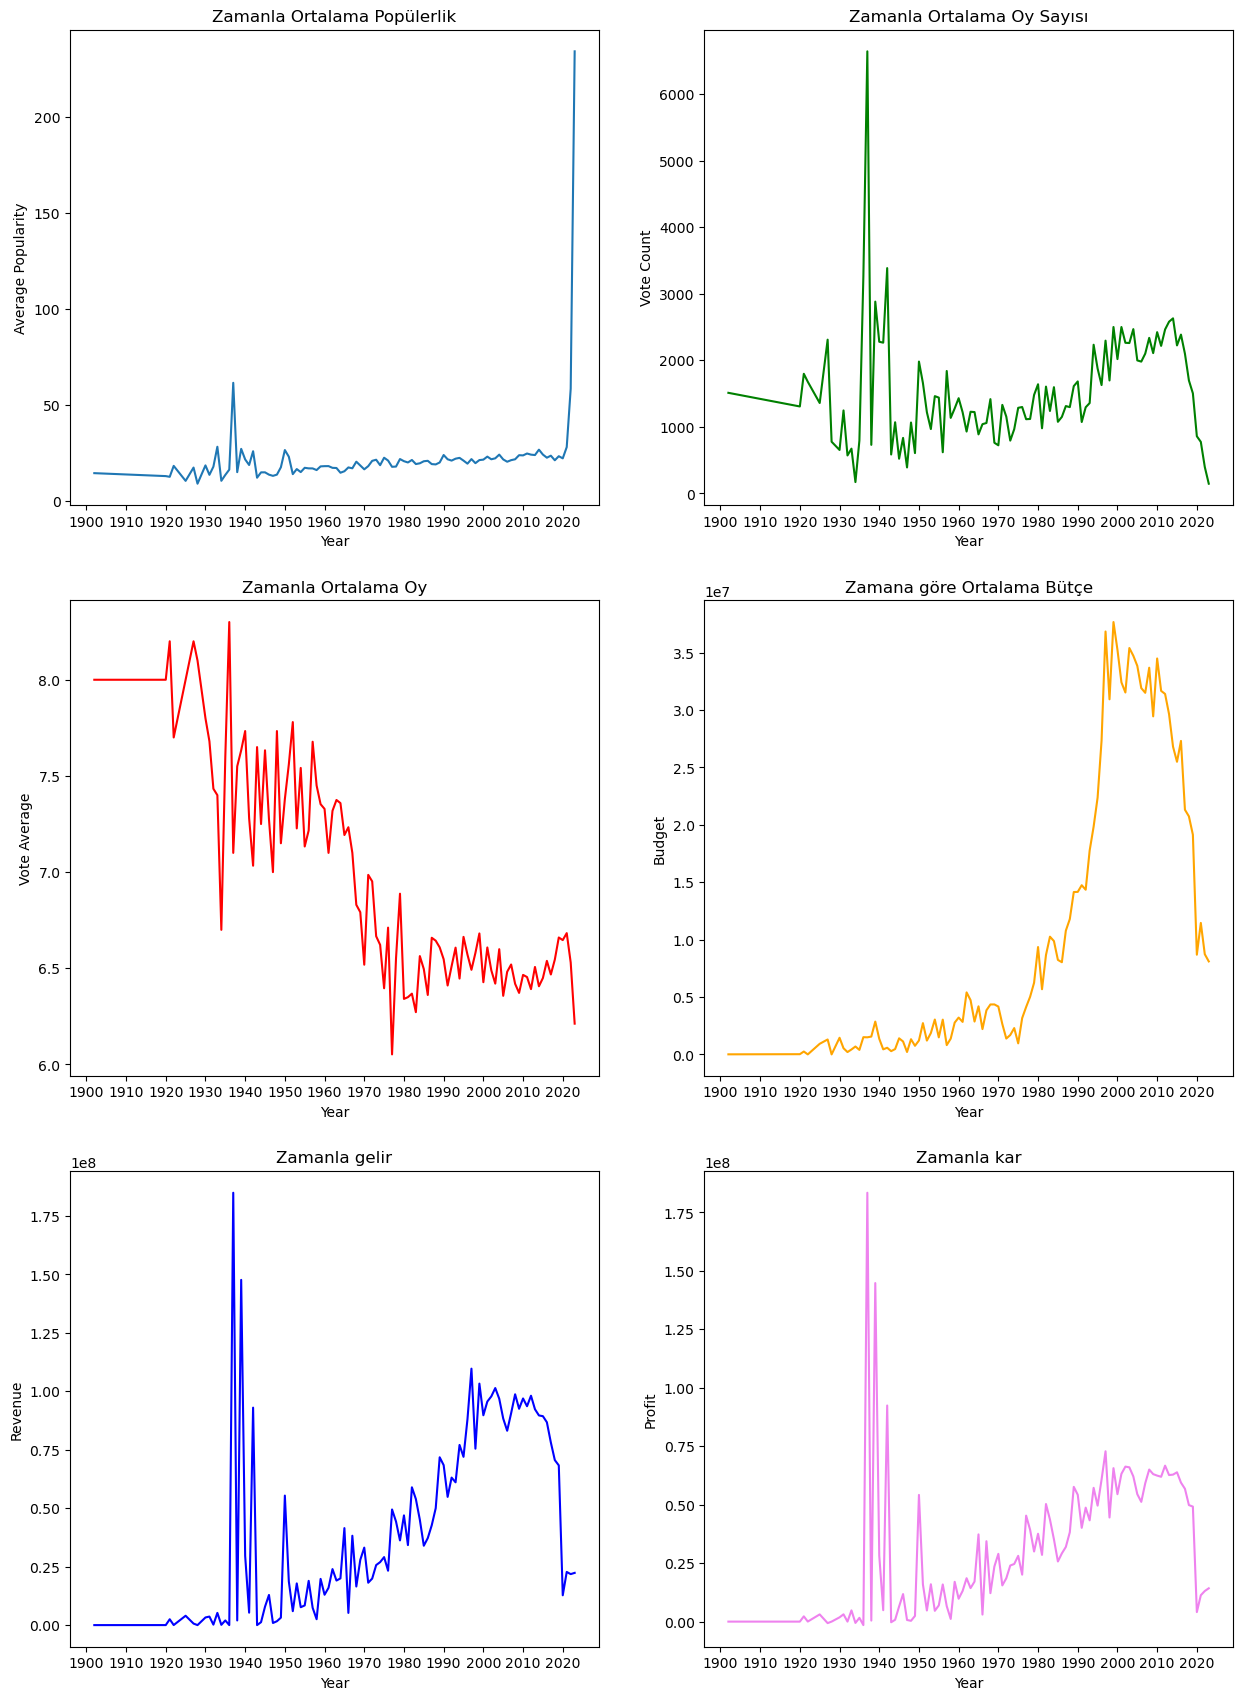

In [70]:
# Kategorilerin Yıllara Göre Görselleştirilmesi

fig, axs = plt.subplots(3,2,figsize=(15,21))

axs[0,0].plot(avg_pop.index, avg_pop.values)
axs[0,0].set_title('Zamanla Ortalama Popülerlik')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Average Popularity')
axs[0,0].set_xticks(np.arange(1900, 2030, step=10))

axs[0,1].plot(df.groupby('year')['vote_count'].mean(),color='green')
axs[0,1].set_title('Zamanla Ortalama Oy Sayısı')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Vote Count')
axs[0,1].set_xticks(np.arange(1900, 2030, step=10))

axs[1,0].plot(df.groupby('year')['vote_average'].mean(),color='red')
axs[1,0].set_title('Zamanla Ortalama Oy')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xticks(np.arange(1900, 2030, step=10))

axs[1,1].plot(df.groupby('year')['budget'].mean(), color='orange')
axs[1,1].set_title('Zamana göre Ortalama Bütçe')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Budget')
axs[1,1].set_xticks(np.arange(1900, 2030, step=10))

axs[2,0].plot(df.groupby('year')['revenue'].mean(),color='blue')
axs[2,0].set_title('Zamanla gelir')
axs[2,0].set_xlabel('Year')
axs[2,0].set_ylabel('Revenue')
axs[2,0].set_xticks(np.arange(1900, 2030, step=10))

axs[2,1].plot(df.groupby('year')['profit'].mean(), color='violet')
axs[2,1].set_title('Zamanla kar')
axs[2,1].set_xlabel('Year')
axs[2,1].set_ylabel('Profit')
axs[2,1].set_xticks(np.arange(1900, 2030, step=10))

plt.show()


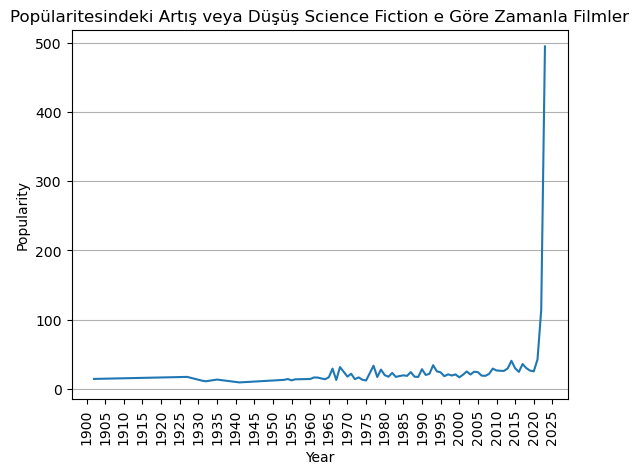

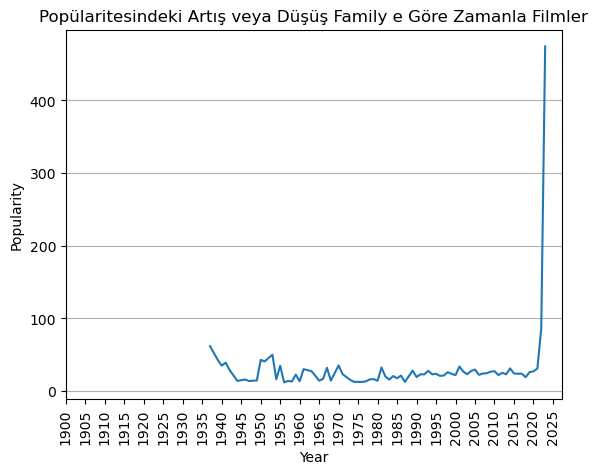

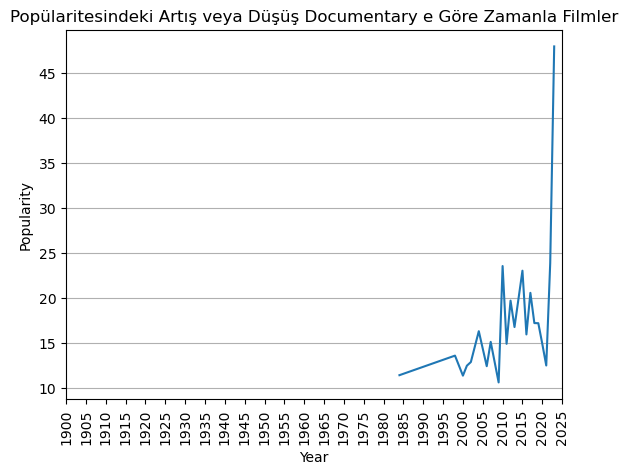

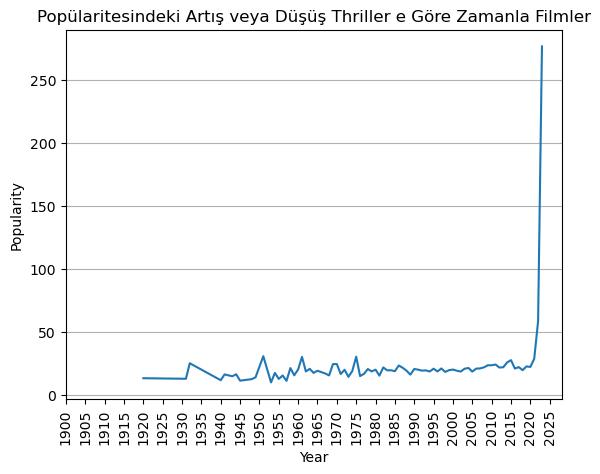

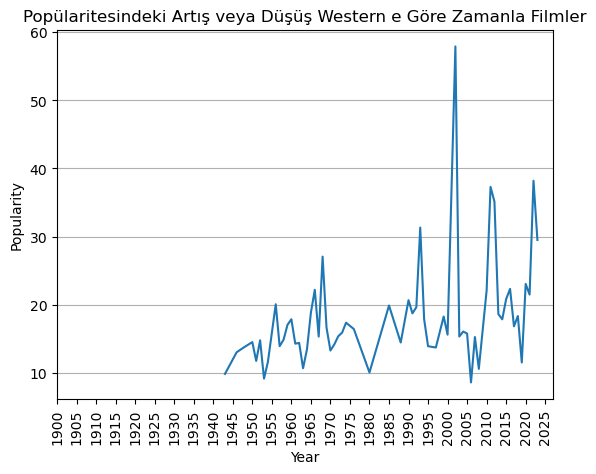

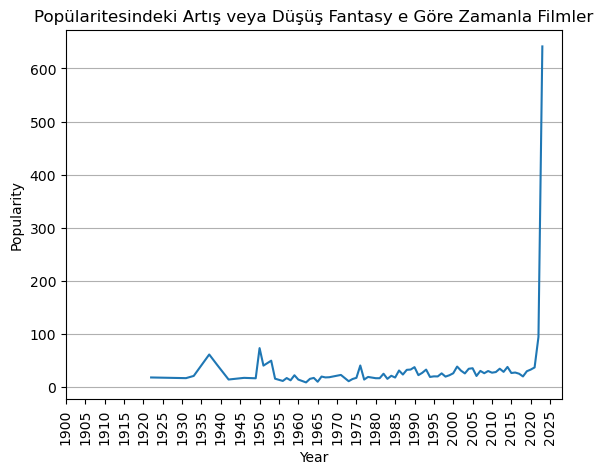

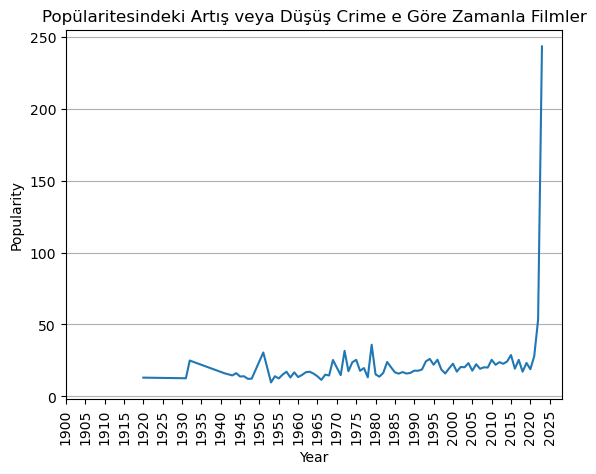

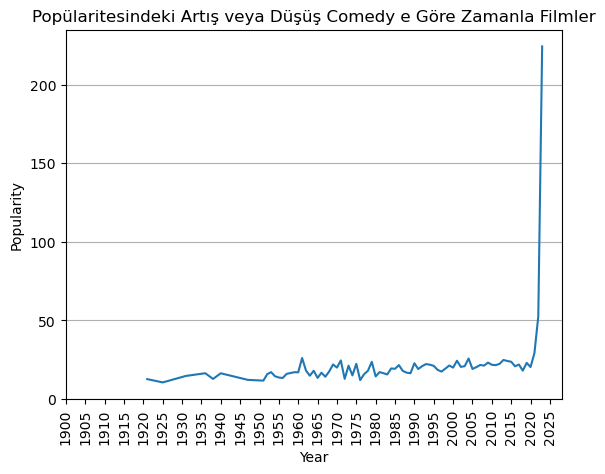

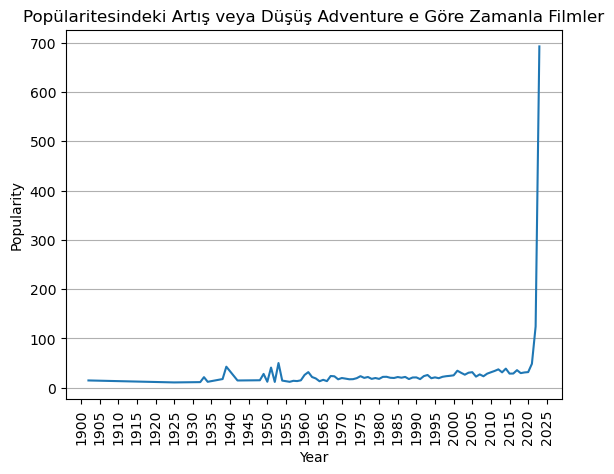

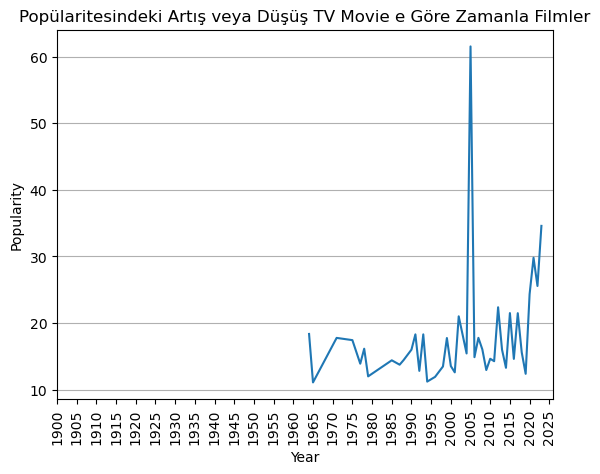

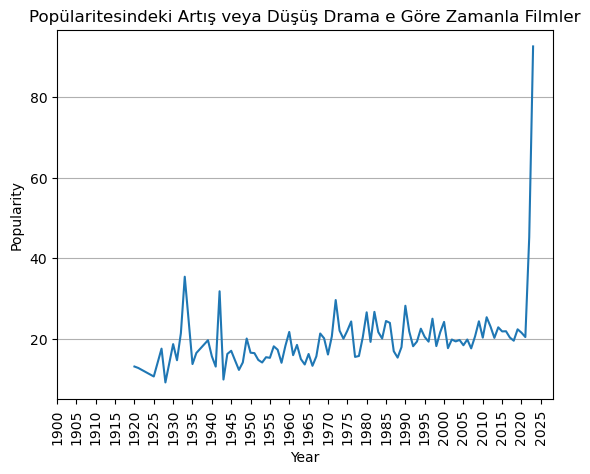

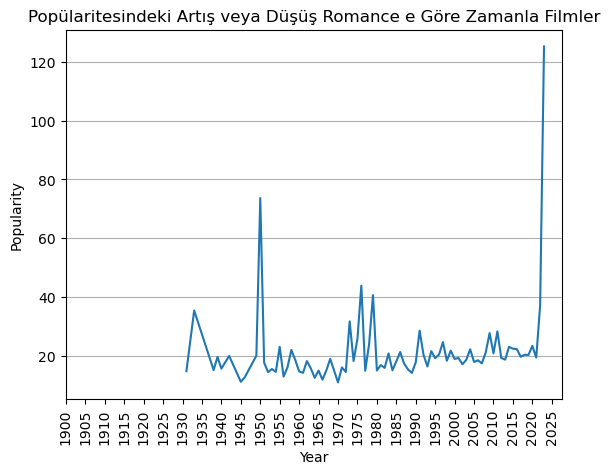

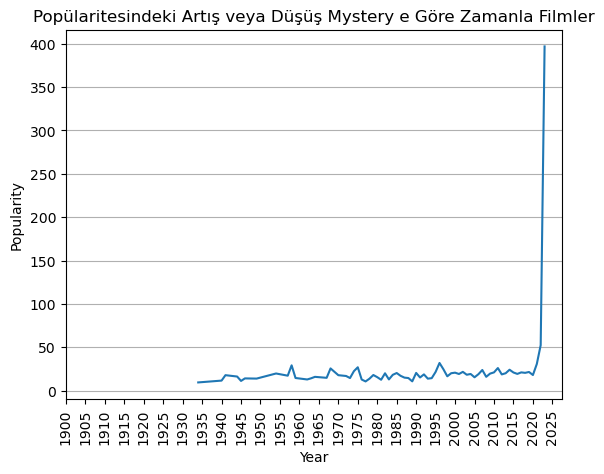

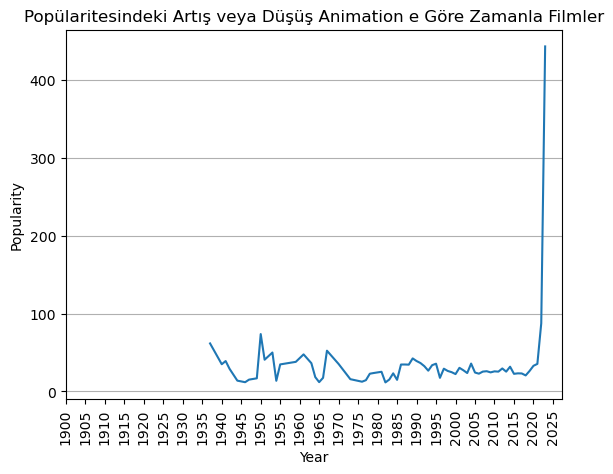

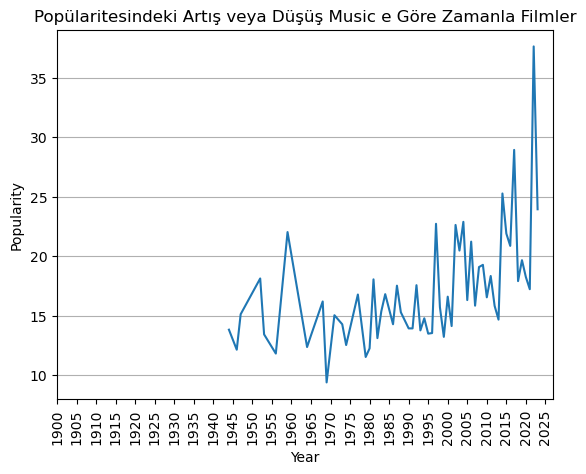

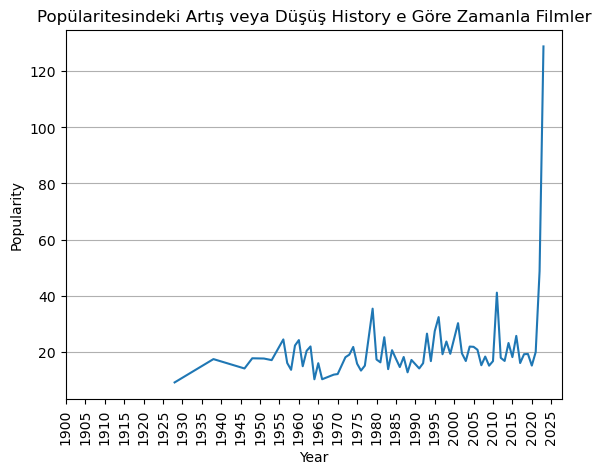

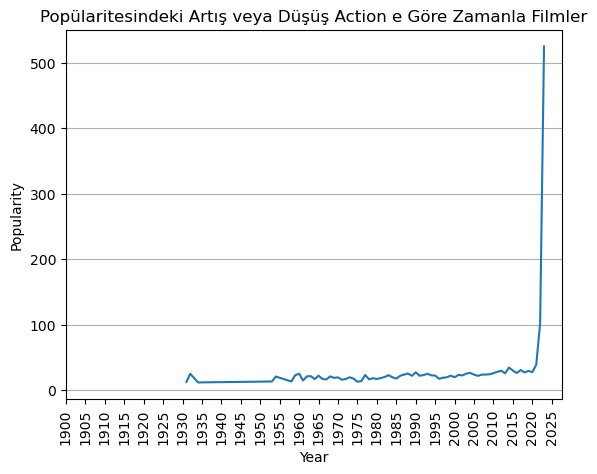

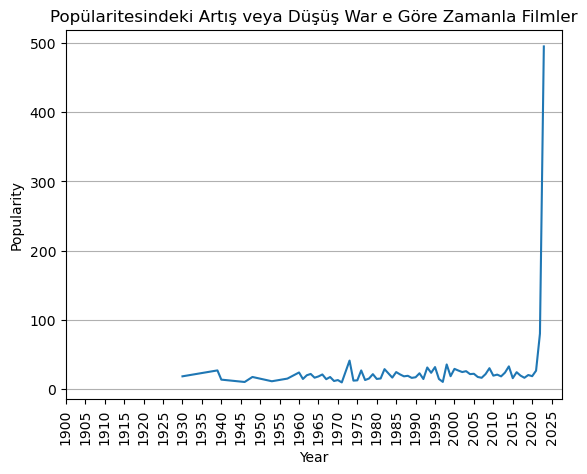

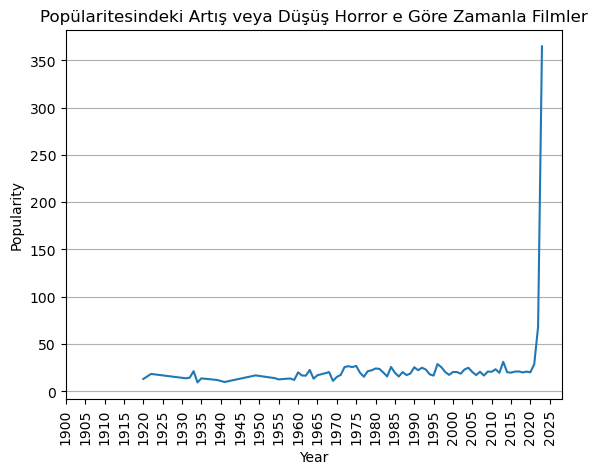

In [77]:
#Popülaritenin Yükselişinin ve Düşüşünün Zaman İçinde Farklı 
#Türlerle Görselleştirilmesi


for genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)]
    avg_popularity = movies.groupby('year')['popularity'].mean()
    plt.plot(avg_popularity.index, avg_popularity.values)
    plt.title('Popülaritesindeki Artış veya Düşüş '+str(genre)+' e Göre Zamanla Filmler')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=5),rotation=90)
    plt.grid(axis='y')
    plt.show()

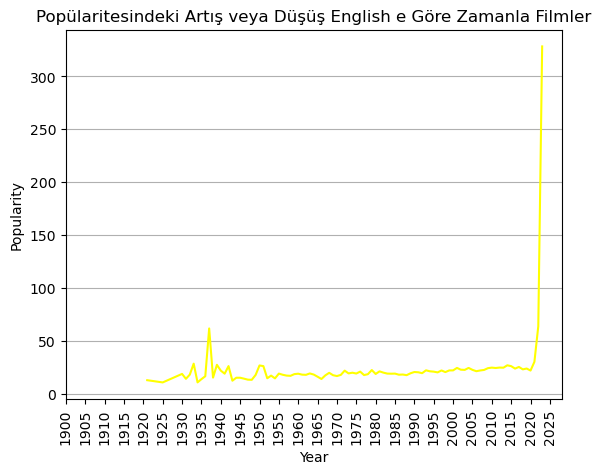

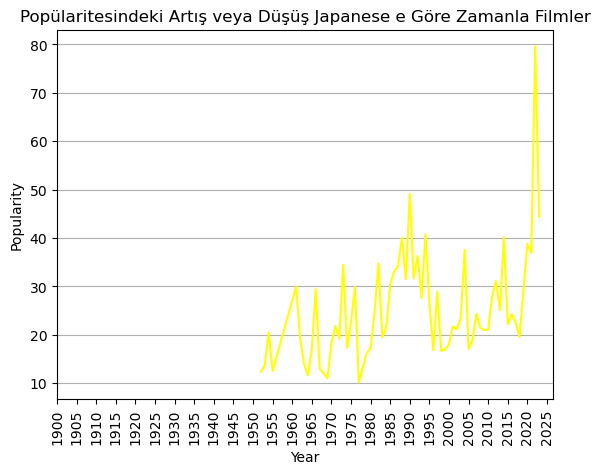

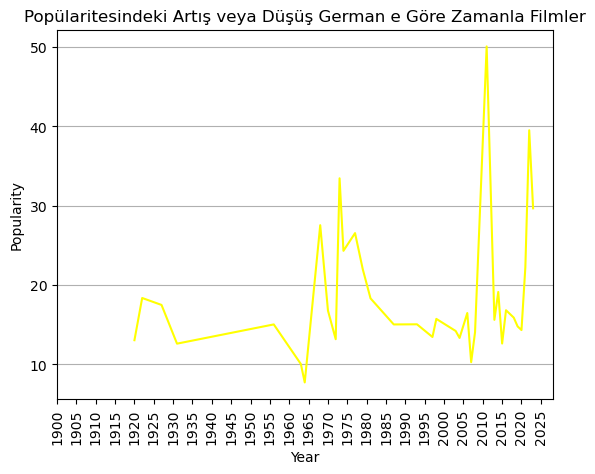

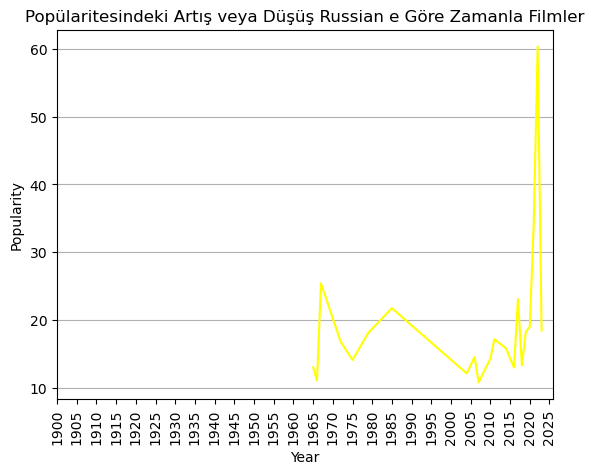

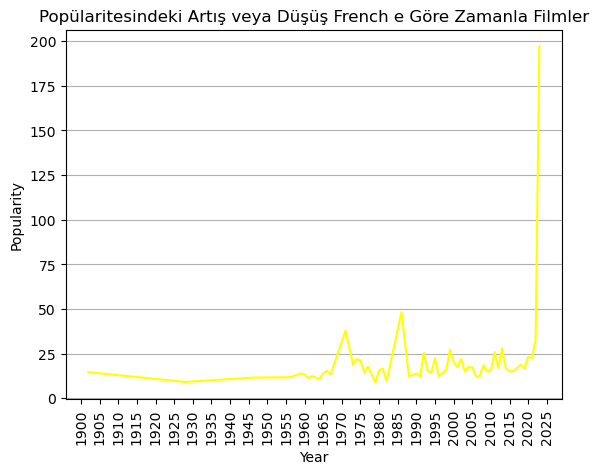

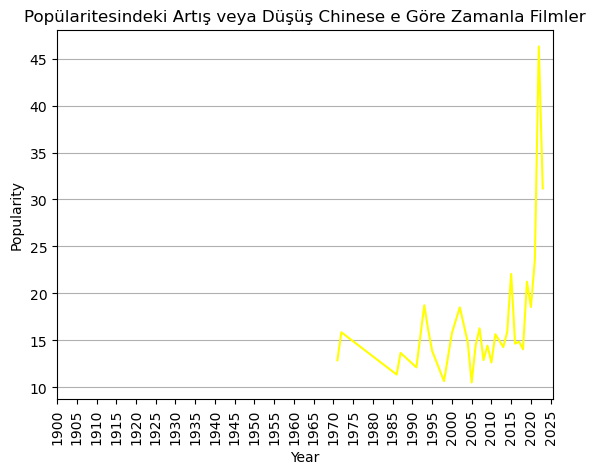

In [76]:
#Popülaritenin Yükselişinin ve Düşüşünün Zaman İçinde Farklı
#Dillerle Görselleştirilmesi


unique_lang = {"English","Japanese","French","Chinese","German","Russian"}
   
for language in unique_lang:
    movies = df[df['original_language'].str.contains(language)]
    avg_popularity = movies.groupby('year')['popularity'].mean()
    plt.plot(avg_popularity.index, avg_popularity.values, color='yellow')
    plt.title('Popülaritesindeki Artış veya Düşüş '+str(language)+' e Göre Zamanla Filmler')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=5),rotation=90)
    plt.grid(axis='y')
    plt.show()